In [1]:
from ml_time_series import generate_envelope

In [2]:
def proccess_data(original_data, num_samples):
    
    print 'Xc cleaned shape ', original_data.shape

    Xc = generate_envelope(original_data, num_samples)

    print 'Xc temporal-serie shape ', Xc.shape
    print Xc

In [3]:
x = np.arange(5)
y = np.arange(1,7).reshape(3, 2)
print x.shape
print y.shape
print x
print y

NameError: name 'np' is not defined

In [87]:
proccess_data(x,3)
proccess_data(y,2)

Xc cleaned shape  (5,)
Xc temporal-serie shape  (3, 3)
[[0 1 2]
 [1 2 3]
 [2 3 4]]
Xc cleaned shape  (3, 2)
[[1 2 3 4]
 [3 4 5 6]]
Xc temporal-serie shape  (2, 4)
[[1 2 3 4]
 [3 4 5 6]]


In [79]:
proccess_data(x,3)
proccess_data(y,2)

Xc cleaned shape  (5,)
Xc temporal-serie shape  (3, 3)
[[0 1 2]
 [1 2 3]
 [2 3 4]]
Xc cleaned shape  (3, 2)
Xc temporal-serie shape  (2, 4)
[[1 2 3 4]
 [3 4 5 6]]


In [296]:
data = np.load('DB_GRIP/'+'data_220833'+'.npy')
Xc_1 = data[:10000,1]

In [297]:
Xc_1.shape

(10000,)

In [313]:
y

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [298]:
Xc_1

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [1]:
import os
import pandas as pd
import numpy as np
import Data_Savior_J
from Data_Savior_J import load_file
import scipy as sp
from scipy import signal

files = ['data_220833','data_220853','data_220915','data_220933', 'data_220951']

DATAFILE = np.load('DB_GRIP/'+files[2]+'.npy')
df = pd.DataFrame(DATAFILE, columns=['Sample','Label'])

df.head()

,Sample,Label
0,464.0,1.0
1,490.0,1.0
2,469.0,1.0
3,511.0,1.0
4,485.0,1.0


In [238]:
DATAFILE.shape

(20000, 2)

<IPython.core.display.Javascript object>


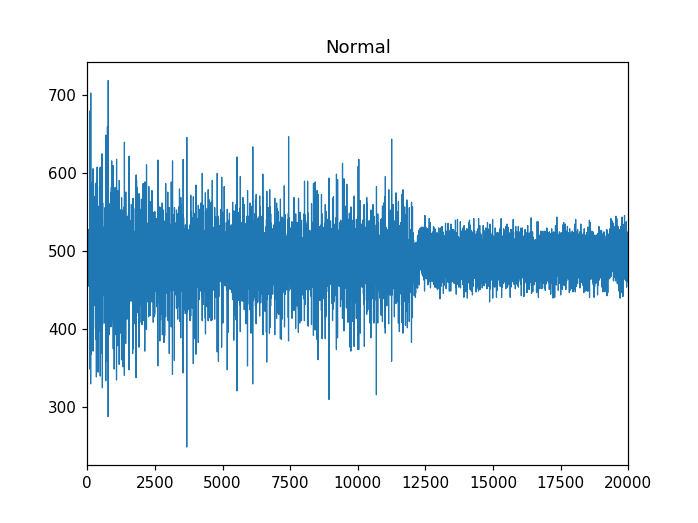

In [209]:
%matplotlib notebook
import matplotlib.pyplot as plt

df['Sample'].plot(linewidth=0.8)
plt.title('Normal')

---
# Processing
---

In [236]:
def generate_envelope(original_data, num_samples):
    new_Xc = np.array([])
    for i in np.arange(num_samples - 1, original_data.shape[0]):
        #x = Xc_1[i - (NUM_SAMPLES - 1) : i+1, :].ravel()
        x = original_data[i - (num_samples - 1) : i+1].ravel()        
        if new_Xc.shape[0] == 0:
            new_Xc = x
        else:
            new_Xc = np.vstack((new_Xc, x))
    return new_Xc

In [333]:
def proccess_data(file_,DATA):
    
    #datafile = os.path.join(DATADIR, DATAFILE)
    #datafile = DATAFILE

    # Remove header, Nan and trash
    data = np.load('DB_GRIP/'+file_+'.npy')
    Xc_1 = data[:10000 ,0]
    Xc_2 = data[10000: ,0]
    
    print '\nXc_1 cleaned shape ', Xc_1.shape
    print 'Xc_2 cleaned shape ', Xc_2.shape
    
    #Create temporal serie
    NUM_SAMPLES = 50
    #NUM_COLS = Xc_1.shape[1]

    
    Xc_1 = generate_envelope(Xc_1, NUM_SAMPLES)
    Xc_2 = generate_envelope(Xc_2, NUM_SAMPLES)
    
    
    print 'Xc_1 temporal-serie shape ', Xc_1.shape
    print 'Xc_2 temporal-serie shape ', Xc_2.shape
    
    #Labeling the type of movement
    C = (np.ones(len(Xc_1))*0).reshape((len(Xc_1),1))
    Xc_1 = np.hstack((Xc_1.reshape(Xc_1.shape),C.reshape((len(Xc_1),1))))


    C = (np.ones(len(Xc_2))*1).reshape((len(Xc_2),1))
    Xc_2 = np.hstack((Xc_2.reshape(Xc_2.shape),C.reshape((len(Xc_2),1))))
    
    print 'Xc labeled shape ', Xc_1.shape
    print 'Xc labeled shape ', Xc_2.shape
    
    # Salving in file on the folder <classifier_data>
    from Data_Savior_J import save_it_now
    save_it_now(Xc_1, './preprocessed_data/'+file_+'_o.'+'data')
    print file_+'_o.'+'data'
    
    from Data_Savior_J import save_it_now
    save_it_now(Xc_2, './preprocessed_data/'+file_+'_p.'+'data')
    print file_+'_p.'+'data'
    DATA.append(file_+'_o.'+'data')
    DATA.append(file_+'_p.'+'data')

In [334]:
files = ['data_220833','data_220853','data_220915','data_220933', 'data_220951']
DATA = []
for i in files:
    proccess_data(i,DATA)


Xc_1 cleaned shape  (10000,)
Xc_2 cleaned shape  (10000,)
Xc_1 temporal-serie shape  (9951, 50)
Xc_2 temporal-serie shape  (9951, 50)
Xc labeled shape  (9951, 51)
Xc labeled shape  (9951, 51)
Saved to file
data_220833_o.data
Saved to file
data_220833_p.data

Xc_1 cleaned shape  (10000,)
Xc_2 cleaned shape  (10000,)
Xc_1 temporal-serie shape  (9951, 50)
Xc_2 temporal-serie shape  (9951, 50)
Xc labeled shape  (9951, 51)
Xc labeled shape  (9951, 51)
Saved to file
data_220853_o.data
Saved to file
data_220853_p.data

Xc_1 cleaned shape  (10000,)
Xc_2 cleaned shape  (10000,)
Xc_1 temporal-serie shape  (9951, 50)
Xc_2 temporal-serie shape  (9951, 50)
Xc labeled shape  (9951, 51)
Xc labeled shape  (9951, 51)
Saved to file
data_220915_o.data
Saved to file
data_220915_p.data

Xc_1 cleaned shape  (10000,)
Xc_2 cleaned shape  (10000,)
Xc_1 temporal-serie shape  (9951, 50)
Xc_2 temporal-serie shape  (9951, 50)
Xc labeled shape  (9951, 51)
Xc labeled shape  (9951, 51)
Saved to file
data_220933_o.da

In [335]:
Xc = load_file("preprocessed_data/"+DATA[0])
for i in DATA[1:]:
    Xc = np.vstack((Xc,load_file("preprocessed_data/"+i))) 

In [336]:
Xc

array([[ 474.,  472.,  458., ...,  505.,  510.,    0.],
       [ 472.,  458.,  470., ...,  510.,  497.,    0.],
       [ 458.,  470.,  496., ...,  497.,  495.,    0.],
       ..., 
       [ 473.,  491.,  489., ...,  509.,  474.,    1.],
       [ 491.,  489.,  497., ...,  474.,  472.,    1.],
       [ 489.,  497.,  495., ...,  472.,  486.,    1.]])

In [337]:
X = Xc[:,0:(Xc.shape[1]-2)]

yz = Xc[:,[(Xc.shape[1]-1)]]
y = np.array([])
for i in range(len(yz)):
    y = np.hstack((y,yz[i]))

X.shape, y.shape

((99510, 49), (99510,))

In [338]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.25, 
                                                    random_state=10)

In [339]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [340]:
print X_train_std.shape

(74632, 51)


# Random Forest Classifier

In [341]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

print 'Training time'
%time rfc = rfc.fit(X_train_std, y_train)

print''

print 'Predict time'
%time y_pred = rfc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score
print ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))

Training time
CPU times: user 13.9 s, sys: 0 ns, total: 13.9 s
Wall time: 13.9 s

Predict time
CPU times: user 228 ms, sys: 0 ns, total: 228 ms
Wall time: 226 ms

ClassifyRF accuracy:---------->100.00 %


## Confusion Matrix

<IPython.core.display.Javascript object>


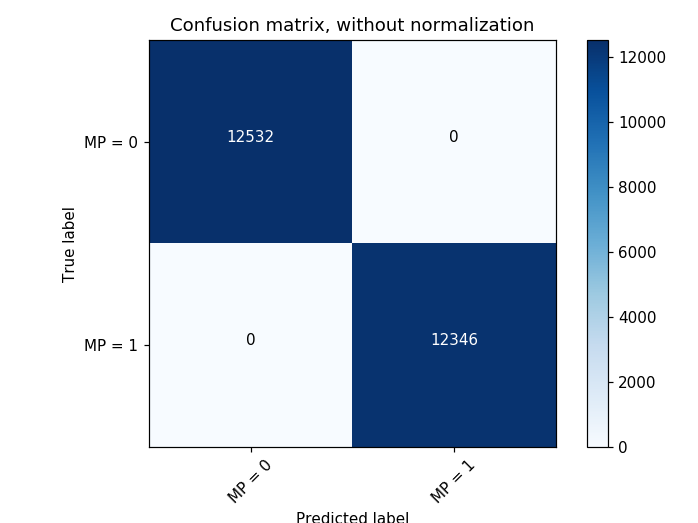

Confusion matrix, without normalization
[[12532     0]
 [    0 12346]]


<IPython.core.display.Javascript object>


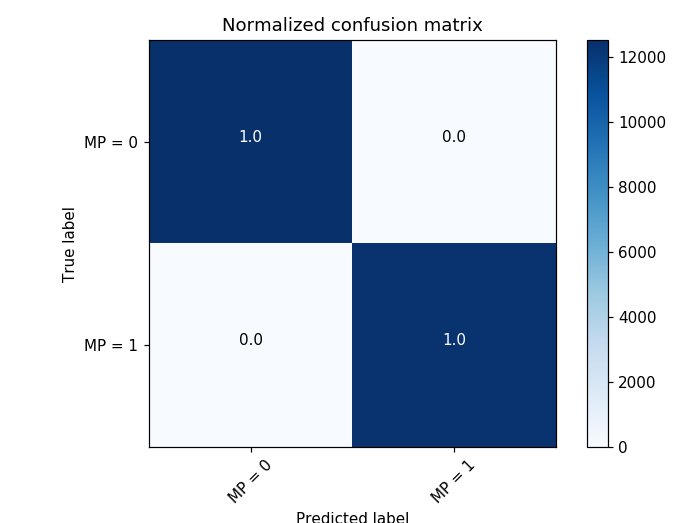

Normalized confusion matrix
[[ 1.  0.]
 [ 0.  1.]]


In [342]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

%matplotlib notebook
class_names = np.array(['MP = 0', 'MP = 1'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


# Support Vector Machine

In [ ]:
from sklearn import svm, datasets

print 'Processing time RBF'
%time rbf_svc = svm.SVC(kernel='rbf', gamma=0.2, C=6, decision_function_shape='ovr').fit(X_train_std, y_train)
print ''

from sklearn.metrics import accuracy_score

def run_svm(svc, X_test_std, y_test):
    y_pred = svc.predict(X_test_std)
    from sklearn.metrics import accuracy_score
    print ('SVM-RBF accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))

        
run_svm(rbf_svc, X_test_std, y_test)

Processing time RBF


## Confusion Matrix

<IPython.core.display.Javascript object>


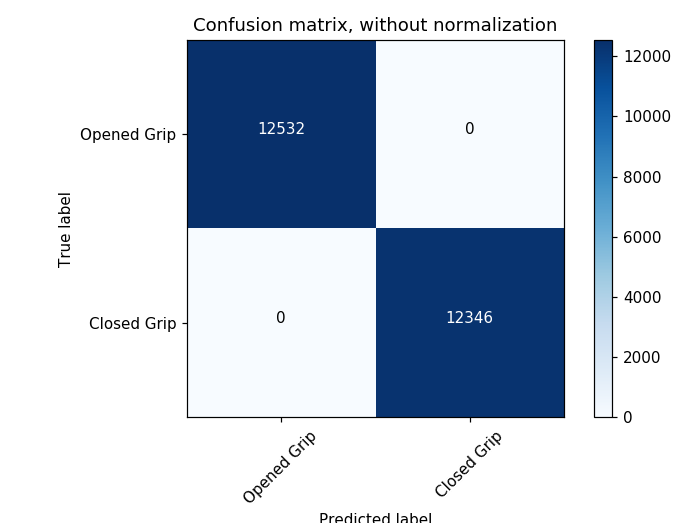

Confusion matrix, without normalization
[[12532     0]
 [    0 12346]]


<IPython.core.display.Javascript object>


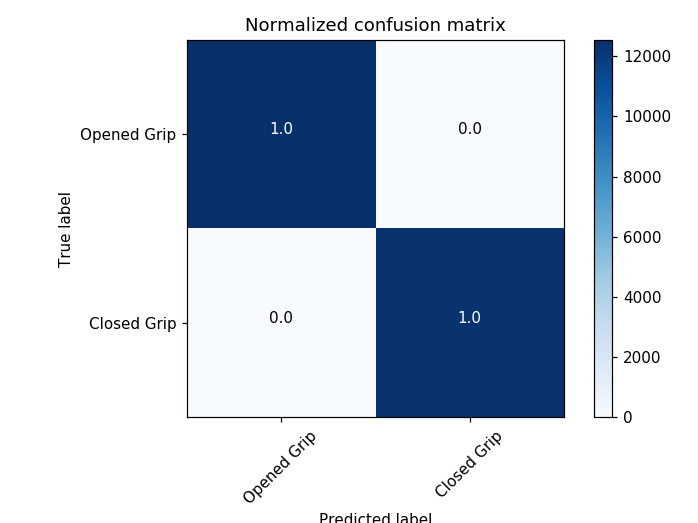

Normalized confusion matrix
[[ 1.  0.]
 [ 0.  1.]]


In [160]:
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib notebook
class_names = np.array(['Opened Grip', 'Closed Grip',])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()